In [48]:
# Asignar directorios de trabajo a "./someweird"
import os
import matplotlib as plt
# os.chdir("./someweird")

DATA_DIR = "./data/20180702_1145_PREP/"
FILE_DATA_PATH = DATA_DIR + "QRO_DIP_LOC_2018.csv"

#
# Cargar archivos de .data/20180702_1145_PREP/QRO_DIP_LOC_2018.csv

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d

# table start in A6

data = pd.read_csv(FILE_DATA_PATH, header=4, dtype=str)
data

,CLAVE_CASILLA,CLAVE_ACTA,ID_ESTADO,ESTADO,ID_DISTRITO_LOCAL,DISTRITO_LOCAL,SECCION,ID_CASILLA,TIPO_CASILLA,EXT_CONTIGUA,...,OBSERVACIONES,CONTABILIZADA,MECANISMOS_TRASLADO,SHA,FECHA_HORA_ACOPIO,FECHA_HORA_CAPTURA,FECHA_HORA_VERIFICACION,ORIGEN,DIGITALIZACION,TIPO_DOCUMENTO
0,220277B0100,220277B0100,22,QUERETARO,1,QUERETARO 01,0277,961,B,00,...,NaN,1,D,77B4E74C39AA83026388F7148239AF76816E8B6D29CC03...,02/07/2018 01:18:43,02/07/2018 02:18:53,02/07/2018 04:25:39,CATD,ESCANER,ACTA PREP
1,220277C0100,220277C0100,22,QUERETARO,1,QUERETARO 01,0277,962,C,00,...,NaN,1,D,C055A6A27C574F57BE0185476BC19756D0290CB26C9FB6...,02/07/2018 01:17:20,02/07/2018 04:40:41,02/07/2018 05:41:19,CATD,ESCANER,ACTA PREP
2,220277C0200,220277C0200,22,QUERETARO,1,QUERETARO 01,0277,963,C,00,...,NaN,1,D,83A57141BC2CB59F7A4D43069AF9DBBA5B13B61320FC59...,02/07/2018 00:42:16,02/07/2018 01:03:58,02/07/2018 01:15:12,CATD,ESCANER,ACTA PREP
3,220277C0300,220277C0300,22,QUERETARO,1,QUERETARO 01,0277,964,C,00,...,NaN,1,D,AB96359CA2A806F9B8A96D9666FC3D74571BA564F32DA1...,02/07/2018 01:18:11,02/07/2018 02:40:52,02/07/2018 05:05:53,CATD,ESCANER,ACTA PREP
4,220277C0400,220277C0400,22,QUERETARO,1,QUERETARO 01,0277,965,C,00,...,NaN,1,D,4D527753D1E7D940AEA1CE9FF61E66A3237D5255359759...,02/07/2018 00:42:51,02/07/2018 01:09:11,02/07/2018 01:37:26,CATD,ESCANER,ACTA PREP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2643,'220560E0100,'220560E0100,22,QUERETARO,15,JALPAN DE SERRA,0560,1866,E,00,...,NaN,1,D,3D4784EAF0E8D2B440B5C1E69CBABAB6529198038D9AEF...,02/07/2018 04:01:00,02/07/2018 04:09:51,02/07/2018 04:13:08,CATD,ESCANER,ACTA PREP
2644,'220560E0200,'220560E0200,22,QUERETARO,15,JALPAN DE SERRA,0560,1867,E,00,...,NaN,1,D,132AB7B5B93DB99D91A4730A20E60B93D08C5A867296E0...,02/07/2018 01:24:12,02/07/2018 01:41:11,02/07/2018 01:50:03,CATD,ESCANER,ACTA PREP
2645,220561B0100,220561B0100,22,QUERETARO,15,JALPAN DE SERRA,0561,1868,B,00,...,NaN,1,D,C6FFB9FC04C0ED64E2932E4880A85007BD4BD02B3E7C6C...,02/07/2018 00:52:07,02/07/2018 01:03:10,02/07/2018 01:08:31,CATD,ESCANER,ACTA PREP
2646,'220561E0100,'220561E0100,22,QUERETARO,15,JALPAN DE SERRA,0561,1869,E,00,...,NaN,1,D,5DA938A7C3E4466246F732E7FCC1BA4D9F084FF3D1764C...,02/07/2018 00:50:46,02/07/2018 01:04:55,02/07/2018 01:06:02,CATD,ESCANER,ACTA PREP


### Comprobacion de las CLAVE_CASILLA Y CLAVE_ACTA

In [60]:
# Obtener todos los registros que no sean iguales CLAVE_CASILLA y CLAVE_ACTA
anomalias = data[data.CLAVE_CASILLA != data.CLAVE_ACTA]
if (len(anomalias)): 
	print("Se encontraron " + str(len(anomalias)) + " registros con CLAVE_CASILLA != CLAVE_ACTA")
	print(anomalias)
else:
    print("No se encontraron registros con CLAVE_CASILLA != CLAVE_ACTA")
print(pd.DataFrame({"CLAVE_CASILLA": data.CLAVE_CASILLA, "CLAVE_ACTA": data.CLAVE_ACTA}))

No se encontraron registros con CLAVE_CASILLA != CLAVE_ACTA
     CLAVE_CASILLA    CLAVE_ACTA
0      220277B0100   220277B0100
1      220277C0100   220277C0100
2      220277C0200   220277C0200
3      220277C0300   220277C0300
4      220277C0400   220277C0400
...            ...           ...
2643  '220560E0100  '220560E0100
2644  '220560E0200  '220560E0200
2645   220561B0100   220561B0100
2646  '220561E0100  '220561E0100
2647   220562B0100   220562B0100

[2648 rows x 2 columns]


### Comprobacion que la CLAVE_CASILLA este conformada por ID_ESTADO, SECCION, TIPO_CASILLA

In [61]:
print("Total de registros: ", len(data))
### Comprobacion que la CLAVE_CASILLA este conformada por ID_ESTADO, SECCION, TIPO_CASILLA
anomalias = data[data.CLAVE_CASILLA.str[:7] != data.ID_ESTADO + data.SECCION + data.TIPO_CASILLA]
if (len(anomalias)):
	print("Se encontraron " + str(len(anomalias)) + " registros con CLAVE_CASILLA != ID_ESTADO+SECCION+TIPO_CASILLA")
	anomalias = anomalias[anomalias.CLAVE_CASILLA.str[1:8] != anomalias.ID_ESTADO + anomalias.SECCION + anomalias.TIPO_CASILLA]
	if (len(anomalias)):
		print("Se encontraron " + str(len(anomalias)) + " registros con CLAVE_CASILLA != ID_ESTADO+SECCION+TIPO_CASILLA")
		print(anomalias[['CLAVE_CASILLA', 'ID_ESTADO', 'SECCION', 'TIPO_CASILLA']])
	else:
		print("Las casillas encontradas anteriormente tienen un caracter anormal al inicio de la CLAVE_CASILLA")

else:
	print("No se encontraron registros con CLAVE_CASILLA != ID_ESTADO+SECCION+TIPO_CASILLA")
print(pd.DataFrame({"CLAVE_CASILLA": data.CLAVE_CASILLA, "ID_ESTADO": data.ID_ESTADO, "SECCION":data.SECCION, "TIPO_CASILLA":data.TIPO_CASILLA}))

Total de registros:  2648
Se encontraron 181 registros con CLAVE_CASILLA != ID_ESTADO+SECCION+TIPO_CASILLA
Las casillas encontradas anteriormente tienen un caracter anormal al inicio de la CLAVE_CASILLA
     CLAVE_CASILLA ID_ESTADO SECCION TIPO_CASILLA
0      220277B0100        22    0277            B
1      220277C0100        22    0277            C
2      220277C0200        22    0277            C
3      220277C0300        22    0277            C
4      220277C0400        22    0277            C
...            ...       ...     ...          ...
2643  '220560E0100        22    0560            E
2644  '220560E0200        22    0560            E
2645   220561B0100        22    0561            B
2646  '220561E0100        22    0561            E
2647   220562B0100        22    0562            B

[2648 rows x 4 columns]


In [29]:
# TOTAL_PERSONAS_VOTARON	TOTAL_REP_PARTIDO_CI_VOTARON	TOTAL_VOTOS_SACADOS

In [ ]:
# TOTAL_VOTOS_SACADOS	# TOTAL_VOTOS_ASENTADO	# TOTAL_VOTOS_CALCULADO

In [129]:
def resume_column(columna, title=None):
	columna_frecuencia = columna.value_counts(dropna=False).sort_values(ascending=False)
	print(f'Cantidad de registros por {columna.name}: \n[{len(columna)}] 100%\n{(columna_frecuencia/columna_frecuencia.sum()*100).apply(lambda x: f"{x:.2f}%")}')
	
	plt.subplot(1, 2, 1)
	plt.pie(columna_frecuencia/columna_frecuencia.sum()*100, labels=(columna_frecuencia/columna_frecuencia.sum()*100).apply(lambda x: f"{x:.2f}%"))
	plt.title(columna.name)
	plt.legend(labels=columna.unique(), loc='lower left', bbox_to_anchor=(0, -0.2))
	plt.subplot(1, 2, 2)
	colores = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'cyan', 'magenta', 'lime', 'pink', 'teal', 'brown', 'gray', 'olive', 'navy']
	plt.bar(range(len(columna.unique())), columna_frecuencia, tick_label=columna.unique(), label=columna.unique(), color = colores[:len(columna.unique())])
	plt.title(columna.name)
	plt.tight_layout()
	plt.show()   

In [81]:
MISSING_DATA_WAYS = ['', '-']
MISSWRITE_DATA_WAYS = ['Sin dato', 'Ilegible']
# Realizar regresion para el llenado de datos faltantes de cada columna
MISSWRITE_COLUMNS = np.array([])
for columna in data.columns:

	# Cuando hay datos faltantes (distinto a datos mal escritos u omitidos). Se llenaran con 0
	if data[columna].isin(MISSING_DATA_WAYS).any():
		# Cambiar los valores faltantes por NaN
		data[columna] = data[columna].replace(MISSING_DATA_WAYS, np.nan)


		# Comprobar que los datos sean numericos
		if data[columna].dropna().astype(str).str.isnumeric().all():
			data[columna] = data[columna].fillna(0).astype(int)
		else:	# NUNCA SUCEDE
			print(f'Columna {columna} con datos no numericos'.upper())
	# Cuando hay datos mal escritos u omitidos. Se llenaran con regresion lineal
	if data[columna].isin(MISSWRITE_DATA_WAYS).any():
		# print(f'Columna {columna} con datos mal escritos u omitidos')
		MISSWRITE_COLUMNS = np.append(MISSWRITE_COLUMNS, columna)

print(f'Columnas con datos mal escritos u omitidos [{len(MISSWRITE_COLUMNS)}]:\n{MISSWRITE_COLUMNS}')

# Guardar datos en un archivo de salida
data.to_csv(DATA_DIR + "QRO_DIP_LOC_2018_clean.csv", index=False)

Columnas con datos mal escritos u omitidos [34]:
['TOTAL_BOLETAS_SOBRANTES' 'TOTAL_PERSONAS_VOTARON'
 'TOTAL_REP_PARTIDO_CI_VOTARON' 'TOTAL_VOTOS_SACADOS' 'PAN' 'PRI' 'PRD'
 'MC' 'PANAL' 'PVEM' 'PES' 'M' 'PT' 'CQ' 'QI' 'MORENA_PT_PES' 'MORENA_PT'
 'MORENA_PES' 'PT_PES' 'PRI_PVEM' 'PAN_PRD_MC' 'PAN_PRD' 'PAN_MC' 'PRD_MC'
 'CAND_IND_2' 'CAND_IND_10' 'CAND_IND_14' 'CAND_IND_15' 'CAND_IND_23'
 'CAND_IND_24' 'CAND_IND_25' 'NO_REGISTRADOS' 'NULOS'
 'TOTAL_VOTOS_ASENTADO']


Cantidad de registros por UBICACION_CASILLA: 
[193] 100%
NO URBANA    66.84%
URBANA       33.16%
Name: UBICACION_CASILLA, dtype: object


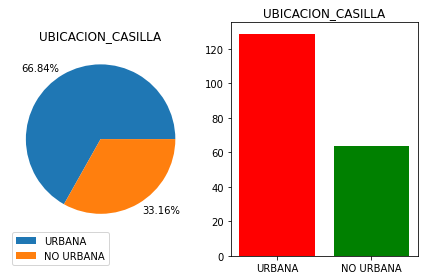

In [130]:
resume_column(data[data['DISTRITO_LOCAL']=='QUERETARO 13']['UBICACION_CASILLA'])

Cantidad de registros por PAN_PRD_MC: 
[2648] 100%
NaN         87.50%
0            2.83%
1            2.27%
2            2.00%
3            1.81%
4            1.44%
5            0.91%
6            0.60%
Sin dato     0.34%
7            0.23%
8            0.04%
10           0.04%
Name: PAN_PRD_MC, dtype: object


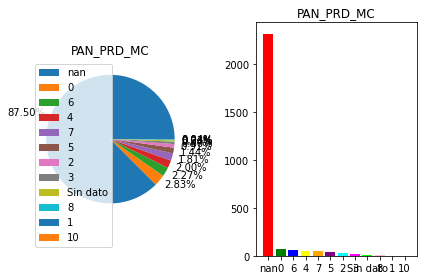

In [131]:
resume_column(data['PAN_PRD_MC'])


Cantidad de registros por UBICACION_CASILLA: 
[2648] 100%
URBANA       55.59%
NO URBANA    44.41%
Name: UBICACION_CASILLA, dtype: object


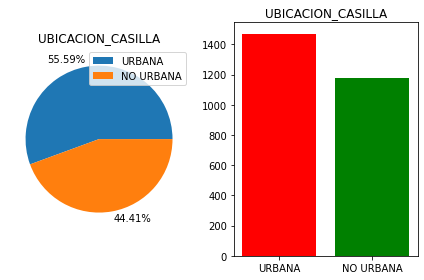

In [111]:
resume_column(data['UBICACION_CASILLA'])


In [49]:
resume_column(data[data[]])


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3495289074.py, line 1)

## Notas durante el analisis 

En la base de datos, ademas de datos faltantes, se contraron incosistencias como:

En que distritos hubo mas votos

El distrito mayormente votado para que partido fue